In [1]:
"""I have referrd to the following sources while working on this assignment:

1. Hands on Machine Learning with scikit-learn and tensorflow by Aurelien Geron
2. https://www.kaggle.com/gargmanish/basic-machine-learning-with-cancer

"""

'I have referrd to the following sources while working on this assignment:\n\n1. Hands on Machine Learning with scikit-learn and tensorflow by Aurelien Geron\n2. https://www.kaggle.com/gargmanish/basic-machine-learning-with-cancer\n\n'

In [54]:
import numpy as np #for linear algebra
import pandas as pd #for chopping, processing
import csv #for opening csv files
%matplotlib inline 
import matplotlib.pyplot as plt #for plotting the graphs
from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.pipeline import Pipeline #to assemble steps for cross validation
from sklearn import svm 
from sklearn.neighbors import NearestNeighbors
from sklearn import tree
from sklearn.naive_bayes import GaussianNB  
from sklearn.cross_validation import train_test_split # to split the data in train and test
from sklearn.cross_validation import KFold # for cross validation
from sklearn.neighbors import KNeighborsClassifier  #for k-neighbor classifier
from sklearn import metrics  # for checking the accuracy 
from time import time
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier 
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score 

In [55]:
col_Names=["sample_code", "clump_thickness", "unif_cell_size", "unif_cell_shape","marginal_adhes","single_epthi_cell_size","bare_nuclei","bland_chromatin","normal_nucleoli","mitoses","result_diagnosed"]
cancer_data = pd.read_csv("/Users/moukthika/Desktop/breast_cancer.csv", names = col_Names)

In [56]:
cancer_data.head(3)

,sample_code,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhes,single_epthi_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,result_diagnosed
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


In [57]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
sample_code               699 non-null int64
clump_thickness           699 non-null int64
unif_cell_size            699 non-null int64
unif_cell_shape           699 non-null int64
marginal_adhes            699 non-null int64
single_epthi_cell_size    699 non-null int64
bare_nuclei               699 non-null object
bland_chromatin           699 non-null int64
normal_nucleoli           699 non-null int64
mitoses                   699 non-null int64
result_diagnosed          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 57.4+ KB


In [58]:
# While all the values are integer type, the "bare_nuclei" is of object type.

In [59]:
cancer_data.describe()

,sample_code,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhes,single_epthi_cell_size,bland_chromatin,normal_nucleoli,mitoses,result_diagnosed
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [60]:
print(cancer_data)

# We know the "bare_nuclei" is of object type because of a few missing values replaced with "?".

     sample_code  clump_thickness  unif_cell_size  unif_cell_shape  \
0        1000025                5               1                1   
1        1002945                5               4                4   
2        1015425                3               1                1   
3        1016277                6               8                8   
4        1017023                4               1                1   
5        1017122                8              10               10   
6        1018099                1               1                1   
7        1018561                2               1                2   
8        1033078                2               1                1   
9        1033078                4               2                1   
10       1035283                1               1                1   
11       1036172                2               1                1   
12       1041801                5               3                3   
13       1043999    

In [61]:
#cancer_data["result_diagnosed"] = map('2':0, '4':1)



#Replacing the missing values with Nan
cancer_data["bare_nuclei"] = cancer_data["bare_nuclei"].replace('?', np.nan)


#median=cancer_data["bare_nuclei"].median() 
#cancer_data["bare_nuclei"] = cancer_data["bare_nuclei"].fillna(median)

"""I decided not to fill in the missing values with median because, while most values in bare nuclei are "1", (1 is also the median)
every "1" in "bare_nuclei" the result diagnosed is not the same. That is in a few cases although "bare"nuclei" is 1, the result
is benign, but in a few cases it is malignant. So one cannot replace all the missing values with "1" which is the median as it
could impact the result diagnosed. Hence, I decided to drop the missing values. When the median was used to replace the missing
values, the accuracy was very high (close to 99 per cent) which is probably due to the incorrect replacement of missing values."""


cancer_data = cancer_data.dropna(subset=["bare_nuclei"])
cancer_data["bare_nuclei"] = cancer_data["bare_nuclei"].astype(int)
#converting "bare_nuclei" into an integer type, in order to be able to plot the values. 
#cancer_data = cancer_data.drop("sample_code", axis = 1)
print(cancer_data)
cancer_data.info()

     sample_code  clump_thickness  unif_cell_size  unif_cell_shape  \
0        1000025                5               1                1   
1        1002945                5               4                4   
2        1015425                3               1                1   
3        1016277                6               8                8   
4        1017023                4               1                1   
5        1017122                8              10               10   
6        1018099                1               1                1   
7        1018561                2               1                2   
8        1033078                2               1                1   
9        1033078                4               2                1   
10       1035283                1               1                1   
11       1036172                2               1                1   
12       1041801                5               3                3   
13       1043999    

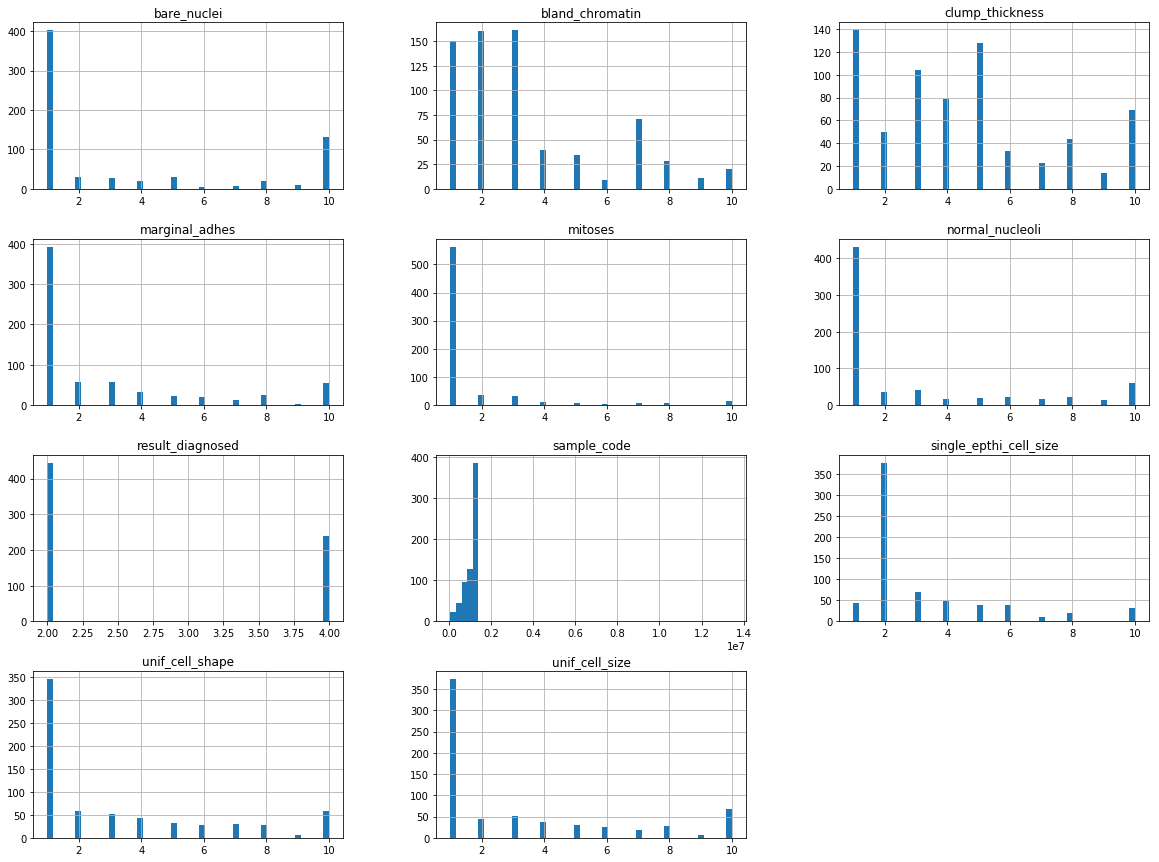

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
cancer_data.hist(bins=50, figsize=(20,15))
plt.show()

In [63]:
corr_matrix = cancer_data.corr()
print(corr_matrix) #we can see that uniform_cell_size and uniform_cell_shape are highly correlated. 

                        sample_code  clump_thickness  unif_cell_size  \
sample_code                1.000000        -0.056350       -0.041396   
clump_thickness           -0.056350         1.000000        0.642481   
unif_cell_size            -0.041396         0.642481        1.000000   
unif_cell_shape           -0.042221         0.653470        0.907228   
marginal_adhes            -0.069630         0.487829        0.706977   
single_epthi_cell_size    -0.048644         0.523596        0.753544   
bare_nuclei               -0.099248         0.593091        0.691709   
bland_chromatin           -0.061966         0.553742        0.755559   
normal_nucleoli           -0.050699         0.534066        0.719346   
mitoses                   -0.037972         0.350957        0.460755   
result_diagnosed          -0.084701         0.714790        0.820801   

                        unif_cell_shape  marginal_adhes  \
sample_code                   -0.042221       -0.069630   
clump_thickness  

C:\Users\moukthika\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B499770>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0F3F5CB0>]], dtype=object)

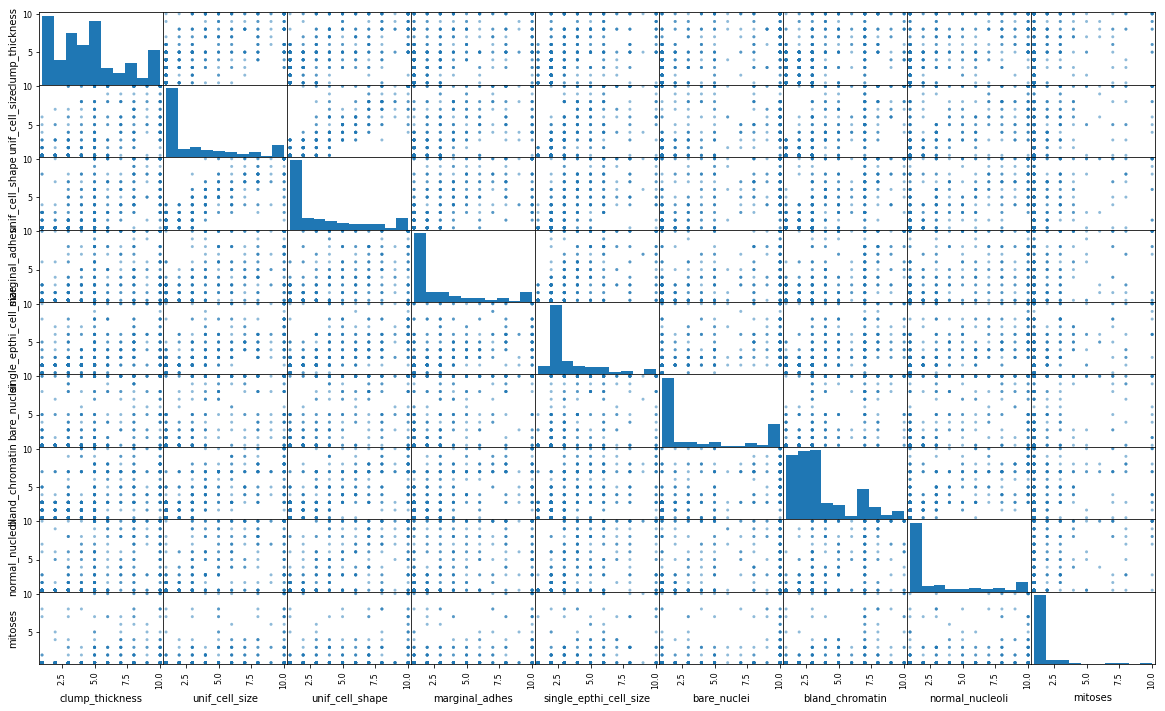

In [64]:
#Understanding correlations from the plots

from pandas.tools.plotting import scatter_matrix
col_Names=["clump_thickness", "unif_cell_size", "unif_cell_shape","marginal_adhes","single_epthi_cell_size","bare_nuclei","bland_chromatin","normal_nucleoli","mitoses"]
scatter_matrix(cancer_data[col_Names], figsize=(20, 12))


In [65]:
#Splitting the data into train and test sets

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(cancer_data, test_size=0.2, random_state=42)
#print(train_set)
print(train_set.shape)
print(test_set.shape)
#cancer_data = train_set.copy()

(546, 11)
(137, 11)


In [66]:
"""From the exploration above, we see that unif_cell_size and unif_cell_shape are highly correlated. I first dropped the
unif_cell_shape since to reduce the dimensionality (without performing any dimensionality reduction), it improved the
accuracy of fit in all the models. However, all the features are used in this analysis """

'From the exploration above, we see that unif_cell_size and unif_cell_shape are highly correlated. I first dropped the\nunif_cell_shape since to reduce the dimensionality (without performing any dimensionality reduction), it improved the\naccuracy of fit in all the models. However, all the features are used in this analysis '

In [67]:
feature_set = ["clump_thickness", "unif_cell_size", "unif_cell_shape", "marginal_adhes","single_epthi_cell_size","bare_nuclei","bland_chromatin","normal_nucleoli","mitoses"]

In [68]:
train_X = train_set[feature_set]
train_y=train_set.result_diagnosed

test_X= test_set[feature_set] 
test_y =test_set.result_diagnosed 

In [69]:
"""With data sets that enable us to diagnose something, it is important that the model we use to predict severity does not 
wrongly categorise a patient's report into a cateory that the patient originally does not belong to, i.e it is necessary to 
make sure that the false positives and false negatives are very low."""


                            """Exploring the performance with different models"""

IndentationError: unexpected indent (<ipython-input-69-7a9f9587739d>, line 6)

In [119]:
                                           """Logistic Regression"""

'Logistic Regression'

In [14]:
clf_lr = LogisticRegression()
clf_lr.fit(train_X,train_y)
pred_lr = clf_lr.predict(test_X)
metrics.accuracy_score(pred_lr, test_y)


0.94890510948905105

In [15]:
cross_val_score(clf_lr,train_X, train_y,cv=3,scoring="accuracy")

array([ 0.95628415,  0.96153846,  0.97790055])

In [16]:
y_train_pred_lr = cross_val_predict(clf_lr, train_X, train_y, cv=3)
confusion_matrix(train_y, y_train_pred_lr) 

array([[357,   8],
       [ 11, 170]], dtype=int64)

In [17]:
precision_score(train_y, y_train_pred_lr, average = 'micro')

0.96520146520146521

In [18]:
from sklearn.metrics import roc_curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(train_y, y_train_pred_lr, pos_label = 4)

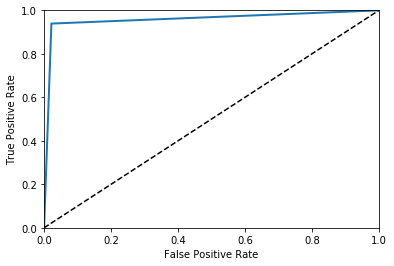

In [19]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--') 
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr_lr, tpr_lr) 
plt.show()

In [ ]:
                                            """SVM Classifier"""

In [20]:
model_svm = svm.SVC()
model_svm.fit(train_X,train_y)
prediction_svm=model_svm.predict(test_X)
print(metrics.accuracy_score(prediction_svm,test_y))

0.956204379562


In [21]:
cross_val_score(model_svm,train_X, train_y,cv=3,scoring="accuracy")

array([ 0.95081967,  0.94505495,  0.9558011 ])

In [22]:
y_train_pred_svm = cross_val_predict(model_svm, train_X, train_y, cv=3)
confusion_matrix(train_y, y_train_pred_svm) 

array([[341,  24],
       [  3, 178]], dtype=int64)

In [23]:
precision_score(train_y, y_train_pred_svm, average = 'micro')

0.9505494505494505

In [24]:
from sklearn.metrics import roc_curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(train_y, y_train_pred_svm, pos_label = 4)

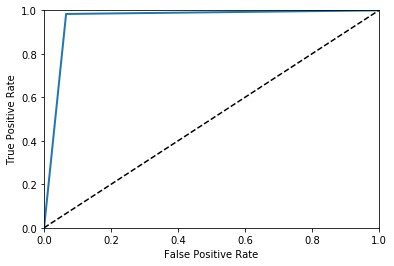

In [25]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--') 
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr_svm, tpr_svm) 
plt.show()

In [ ]:
                                """Stochastic Gradient Descent Classifier"""

In [26]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42) 
sgd_clf.fit(train_X,train_y)
prediction_sgd = sgd_clf.predict(test_X)
metrics.accuracy_score(prediction_sgd, test_y) 

C:\Users\moukthika\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96350364963503654

In [27]:
cross_val_score(sgd_clf,train_X, train_y,cv=3,scoring="accuracy")

C:\Users\moukthika\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\moukthika\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % typ

array([ 0.90163934,  0.9010989 ,  0.83977901])

In [28]:
y_train_pred_sgd = cross_val_predict(sgd_clf, train_X, train_y, cv=3)
confusion_matrix(train_y, y_train_pred_sgd) 

C:\Users\moukthika\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\moukthika\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % typ

array([[300,  65],
       [  0, 181]], dtype=int64)

In [29]:
precision_score(train_y, y_train_pred_sgd, average = 'micro')

0.88095238095238093

In [30]:
from sklearn.metrics import roc_curve
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(train_y, y_train_pred_sgd, pos_label = 4)

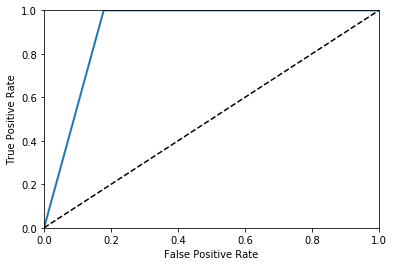

In [31]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--') 
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr_sgd, tpr_sgd) 
plt.show()

In [ ]:
                                        """Naive Bayes Classifier"""

In [32]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(train_X, train_y)
prediction_nb = nb_clf.predict(test_X)
metrics.accuracy_score(prediction_nb,test_y)

0.95620437956204385

In [33]:
cross_val_score(nb_clf,train_X, train_y,cv=3,scoring="accuracy")

array([ 0.9726776 ,  0.95604396,  0.96132597])

In [34]:
y_train_pred_nb = cross_val_predict(nb_clf, train_X, train_y, cv=3)
confusion_matrix(train_y, y_train_pred_nb) 

array([[348,  17],
       [  3, 178]], dtype=int64)

In [35]:
precision_score(train_y, y_train_pred_nb, average = 'micro')

0.96336996336996339

In [36]:
from sklearn.metrics import roc_curve
fpr_nb, tpr_nb, thresholds_nb = roc_curve(train_y, y_train_pred_nb, pos_label = 4)

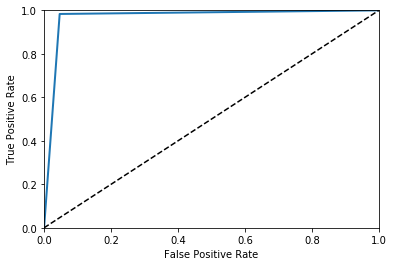

In [37]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--') 
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr_nb, tpr_nb) 
plt.show()

In [ ]:
                                        """K Neighbours Classifier"""

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(train_X, train_y)
pred_knn = classifier.predict(test_X)
metrics.accuracy_score(pred_knn, test_y)

0.94890510948905105

In [39]:
cross_val_score(classifier,train_X, train_y,cv=3,scoring="accuracy")

array([ 0.96721311,  0.96153846,  0.97237569])

In [40]:
y_train_pred_kn = cross_val_predict(classifier, train_X, train_y, cv=3)
confusion_matrix(train_y, y_train_pred_kn) 

array([[358,   7],
       [ 11, 170]], dtype=int64)

In [41]:
precision_score(train_y, y_train_pred_kn, average = 'micro')

0.96703296703296704

In [42]:
from sklearn.metrics import roc_curve
fpr_kn, tpr_kn, thresholds_kn = roc_curve(train_y, y_train_pred_kn, pos_label = 4)

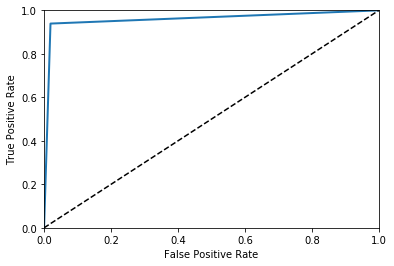

In [43]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--') 
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr_kn, tpr_kn) 
plt.show()

In [ ]:
                                        """Random Forest Classifier"""

In [44]:
model_rc=RandomForestClassifier(n_estimators=100)
model_rc.fit(train_X,train_y)
#y_pred = model_rc.predict(train_y)
prediction_rc = model_rc.predict(test_X)
print(metrics.accuracy_score(prediction_rc,test_y))

0.956204379562


In [45]:
y_pred = cross_val_score(model_rc,train_X, train_y,cv=3,scoring="accuracy")

In [46]:
y_train_pred_rd = cross_val_predict(model_rc, train_X, train_y, cv=3)
confusion_matrix(train_y, y_train_pred_rd)

array([[355,  10],
       [  8, 173]], dtype=int64)

In [47]:
precision_score(train_y, y_train_pred_rd, average = 'micro')

0.96703296703296704

In [48]:
from sklearn.metrics import roc_curve
fpr_rd, tpr_rd, thresholds_rd = roc_curve(train_y, y_train_pred_rd, pos_label = 4)


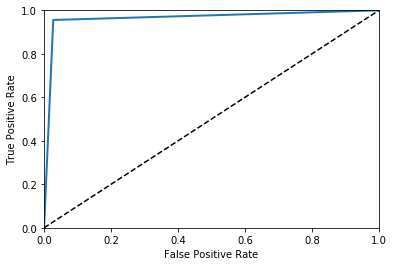

In [49]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--') 
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr_rd, tpr_rd) 
plt.show()


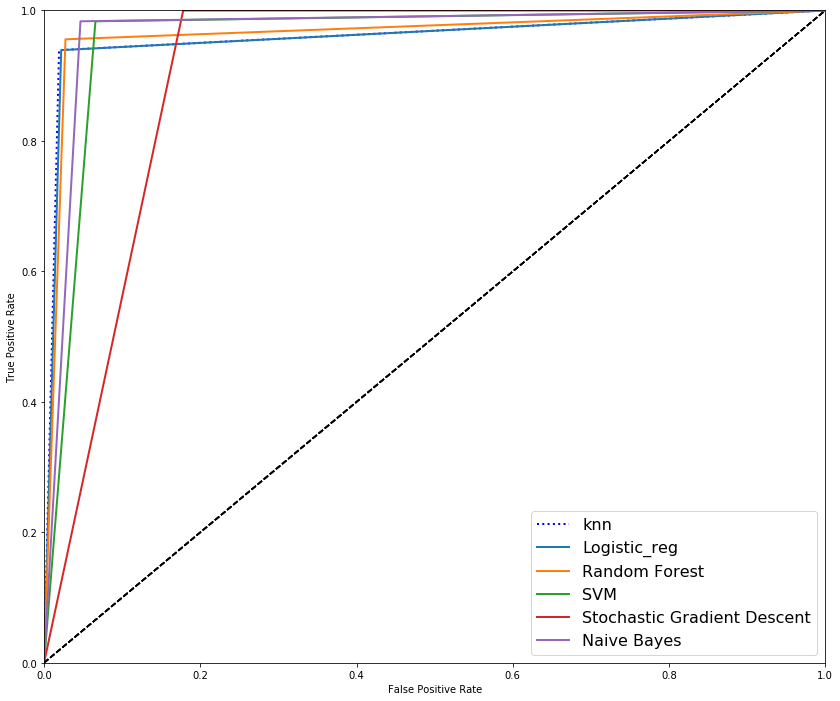

In [51]:
plt.figure(figsize=(14, 12))
plt.plot(fpr_kn, tpr_kn, "b:", linewidth=2, label="knn")
plot_roc_curve(fpr_lr, tpr_lr, "Logistic_reg")
plot_roc_curve(fpr_rd, tpr_rd, "Random Forest")
plot_roc_curve(fpr_svm, tpr_svm, "SVM")
plot_roc_curve(fpr_sgd, tpr_sgd, "Stochastic Gradient Descent")
plot_roc_curve(fpr_nb, tpr_nb, "Naive Bayes")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [ ]:
"""Of all the models, the number of false positive and false negative instances (from the confusion matrix) are the least for KNN, 
Accuracy is not the only factor that we need to consider here, it is important that the model doesn't wrongly diagnose a patient, 
hence it is important that the false positives and false negatives are low. The logistic regression, KNN and Random Forest 
perform well in this aspect. 

Apart from the false positive and false negative count, the ratio of true positive rate to false positive rate in the ROC curve,
can help us understand the models better. The father away from the central line (45 deg), the better the performance of the model
in terms of the true positive rate/false positive rate ratio. Knn and Logistic regression models, seem to perform well in
this aspect. KNN has the least false positives and so out performs logistic regression with a very small margin""".